In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target


In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Add the target variable to the dataframe
df['target'] = dataset.target

# Print the first 5 rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
y = df.pop("target")
X = df

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.916083916083916

In [7]:
from sklearn.ensemble import BaggingClassifier

# TODO: Check sklearn documentation on what is a OOB score and what is the reason for using it?

bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True) 


bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.9370629370629371

##### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(min_samples_split=2)
model_dt.fit(X_train,y_train)
model_dt.score(X_test, y_test)

0.916083916083916

In [9]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=24, min_samples_leaf=1)
model_dt.fit(X_train,y_train)
model_dt.score(X_test, y_test)

0.8951048951048951

##### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=6)
model_rf.fit(X_train,y_train)
model_rf.score(X_test, y_test)

0.9370629370629371

In [11]:
grid_param = {
    "n_estimators" : [90,100],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(5,10,1),
    'min_samples_leaf' : range(1,4,1),
    'min_samples_split': range(2,5,1),
    'max_features' : ['auto','log2']
}

In [12]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_rf, param_grid=grid_param, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [90, 100]},
             verbose=3)

In [13]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [14]:
model_best_rf = RandomForestClassifier(random_state=6, **grid_search.best_params_)
model_best_rf.fit(X_train,y_train)

model_best_rf.score(X_test, y_test)

0.9440559440559441

In [15]:
model_best_rf.n_estimators

100

In [16]:
len(model_best_rf.estimators_)

100

In [17]:
model_best_rf.estimators_[2]

DecisionTreeClassifier(max_depth=8, max_features='log2',
                       random_state=1425842403)

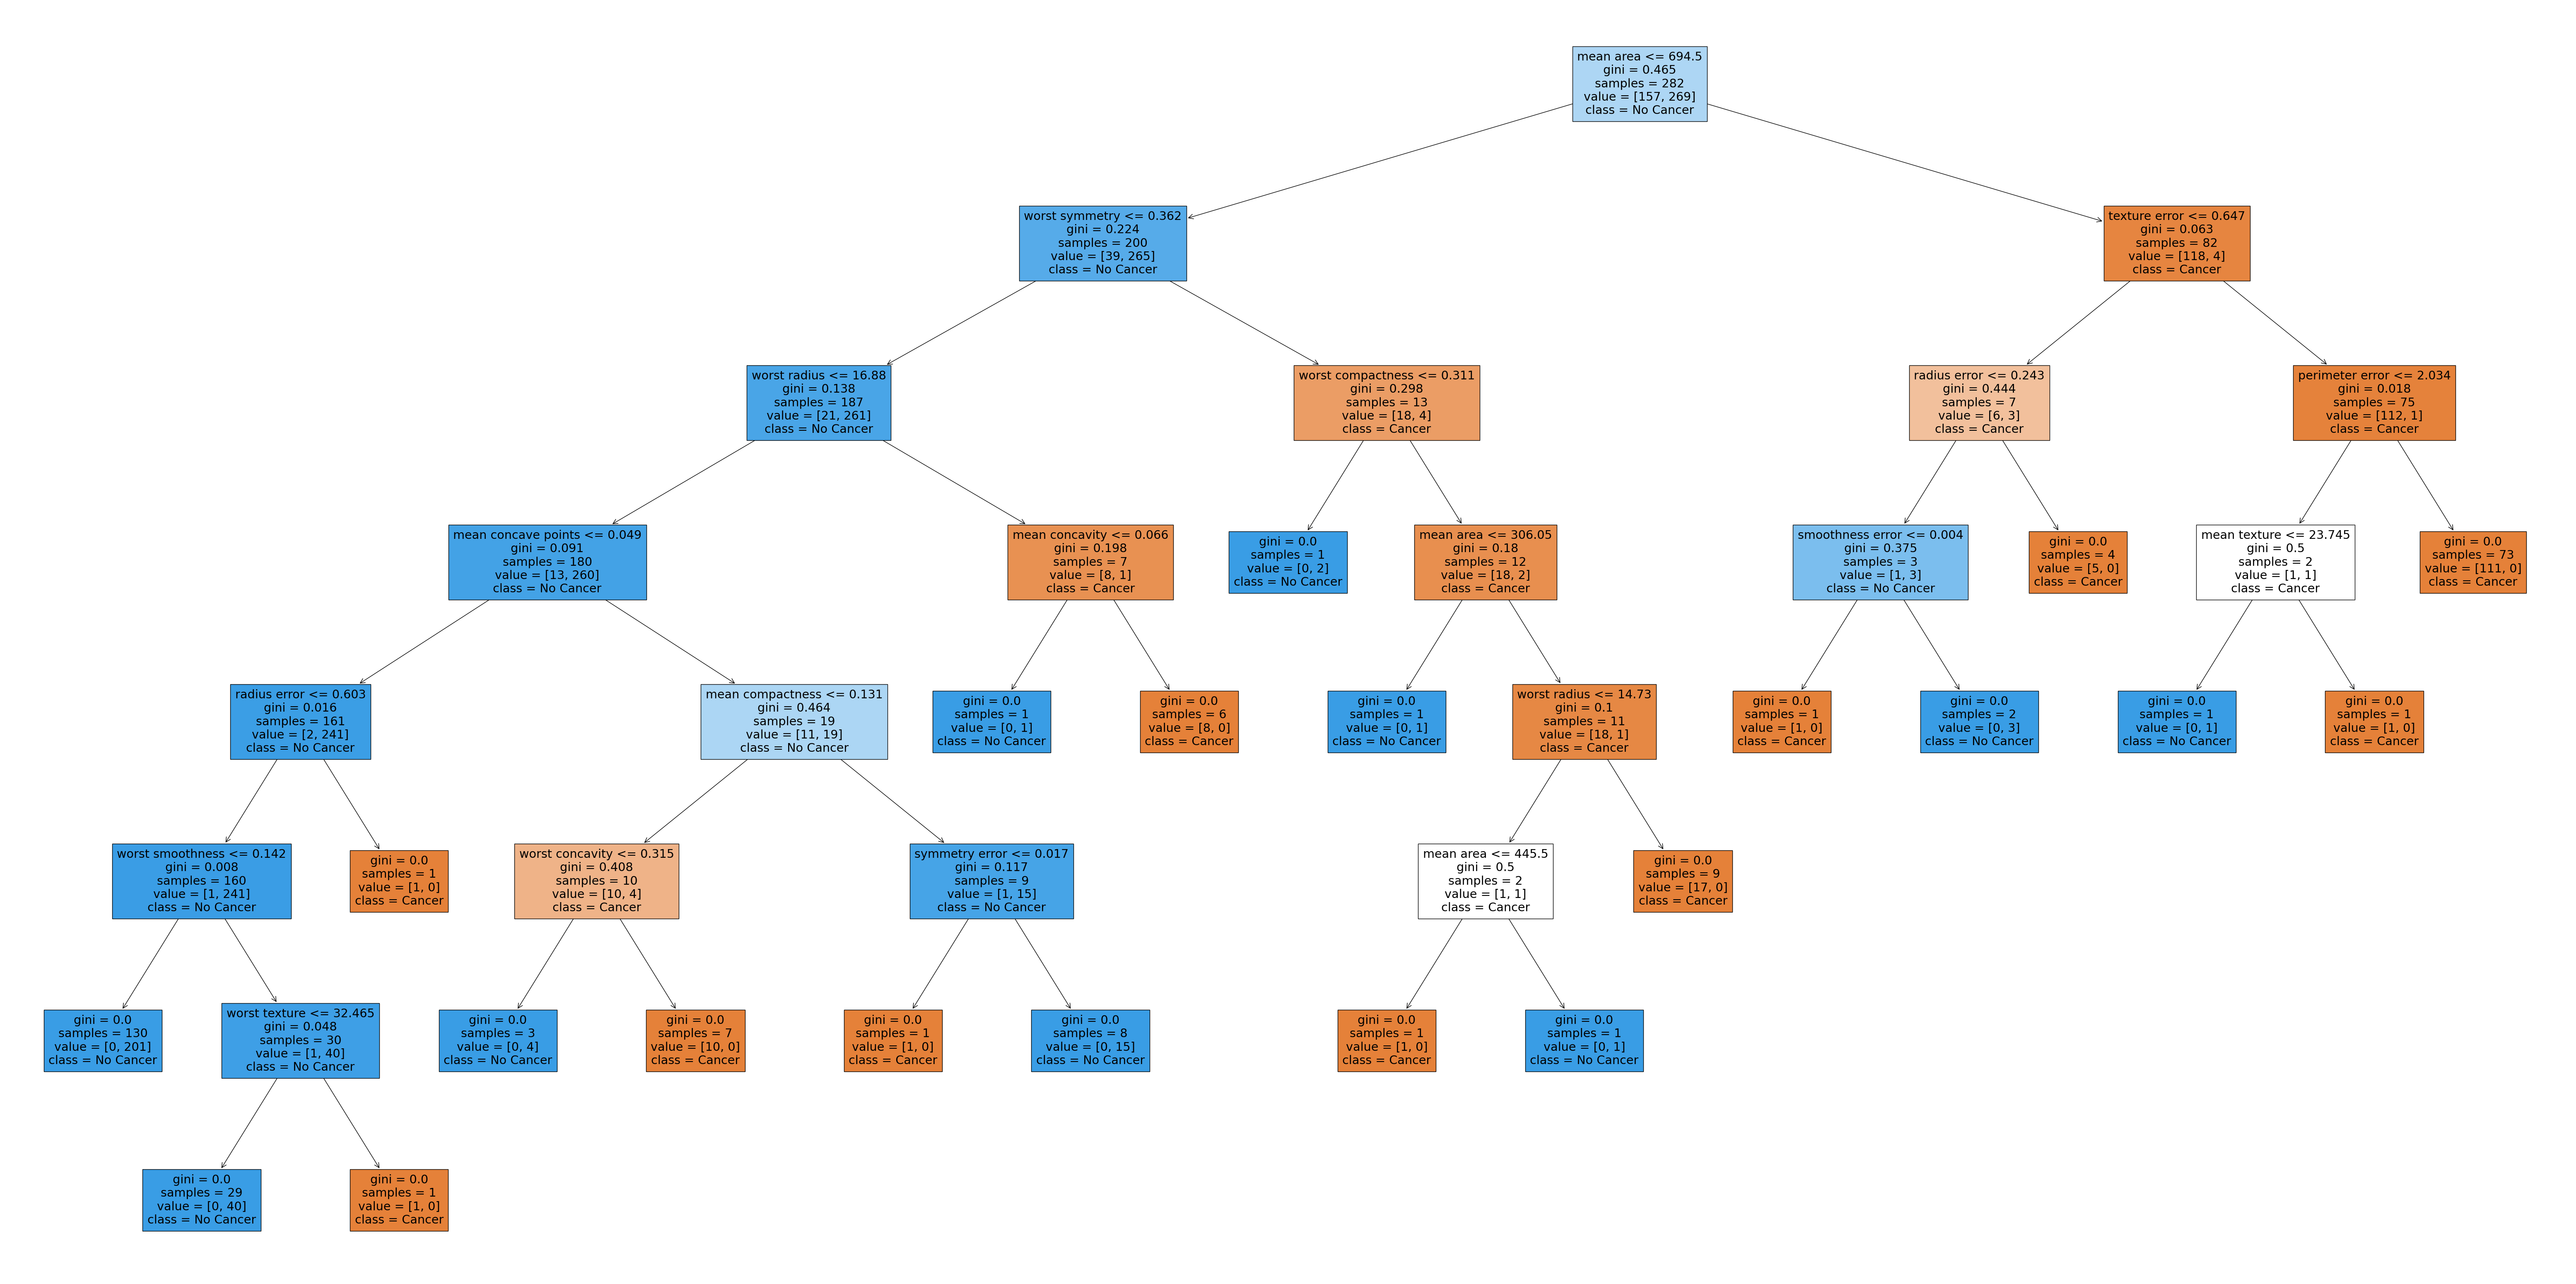

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(model_best_rf.estimators_[2], feature_names = dataset.feature_names,class_names=['Cancer', "No Cancer"],filled=True);

##### Feature Importance

The Random Forest algorithm has built-in feature importance which can be computed in two ways:
1. Gini importance (or mean decrease impurity)
2. Mean Decrease Accuracy - is a method of computing the feature importance on permuted out-of-bag (OOB) samples based on mean decrease in the accuracy. This method is not implemented in the scikit-learn package

Gini importance is computed from Random Forest structure. In the Rf construction, we can measure how each feature decreases the impurity of the split. For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. The drawbacks of the method is to tendency to prefer numerical features and categorical features with high cardinality. For correlated features, it may even select one of the feature and neglect the importance of the second one leading to wrong conclusions.

In [19]:
print(dataset.feature_names)
print(model_best_rf.feature_importances_)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0.04584715 0.01737288 0.08040824 0.07368494 0.0047877  0.01033181
 0.04498912 0.08696232 0.00423567 0.00469967 0.02167294 0.00408307
 0.02846365 0.03785914 0.00588641 0.00383378 0.00853213 0.00210438
 0.00688739 0.00486388 0.09981612 0.01157229 0.12301458 0.08318998
 0.01423147 0.00950032 0.02753971 0.11036474 0.01446912 0.00879542]


<BarContainer object of 30 artists>

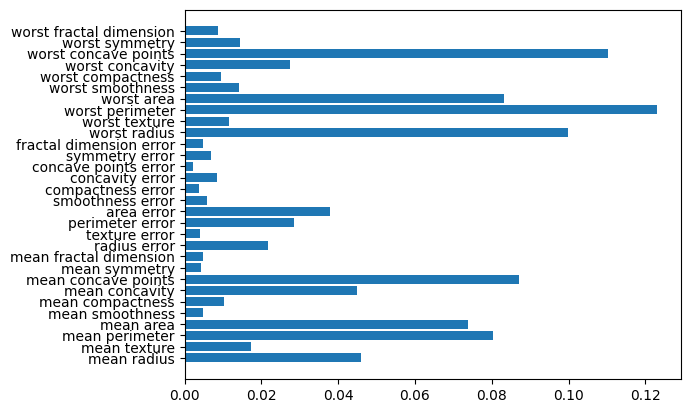

In [20]:
plt.barh(dataset.feature_names, model_best_rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

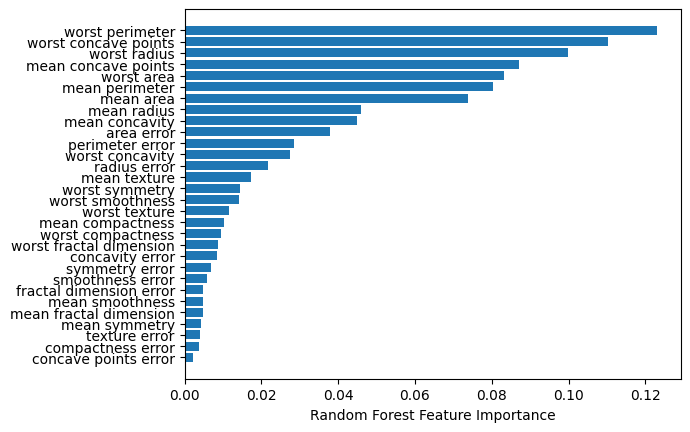

In [21]:
sorted_idx = model_best_rf.feature_importances_.argsort()
plt.barh(dataset.feature_names[sorted_idx], model_best_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [22]:
model_best_rf.estimators_

[DecisionTreeClassifier(max_depth=8, max_features='log2',
                        random_state=1687321482),
 DecisionTreeClassifier(max_depth=8, max_features='log2',
                        random_state=1921895113),
 DecisionTreeClassifier(max_depth=8, max_features='log2',
                        random_state=1425842403),
 DecisionTreeClassifier(max_depth=8, max_features='log2', random_state=899393492),
 DecisionTreeClassifier(max_depth=8, max_features='log2',
                        random_state=1379668586),
 DecisionTreeClassifier(max_depth=8, max_features='log2', random_state=275971437),
 DecisionTreeClassifier(max_depth=8, max_features='log2', random_state=179085647),
 DecisionTreeClassifier(max_depth=8, max_features='log2',
                        random_state=1589607786),
 DecisionTreeClassifier(max_depth=8, max_features='log2', random_state=462381904),
 DecisionTreeClassifier(max_depth=8, max_features='log2',
                        random_state=2083182910),
 DecisionTreeClassif

##### Permutation based feature importance

Permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. This method randomly shuffles each feature and compute the change in the model’s performance. The features impacting performance the most are the most important ones.

Text(0.5, 0, 'Permutation Importance')

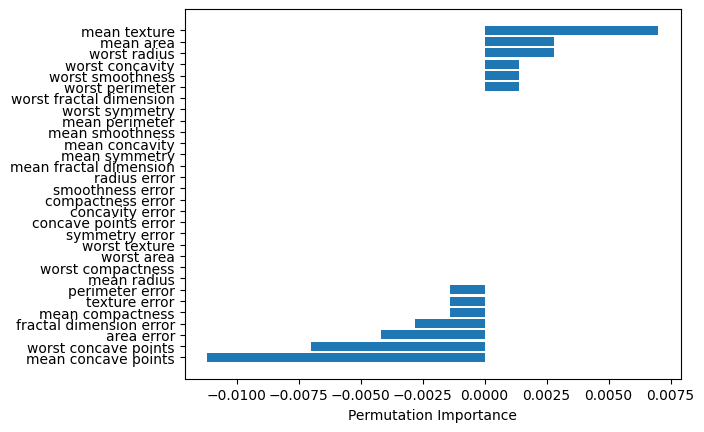

In [23]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model_best_rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(dataset.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

##### SHAP based feature importance

Shapley values are calculated using Cooperative Game Theory. Gives feature importance breakdown per class (label) also

In [24]:
import shap # Requires SHAP install in your environment

explainer = shap.TreeExplainer(model_best_rf)
shap_values = explainer.shap_values(X_test)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


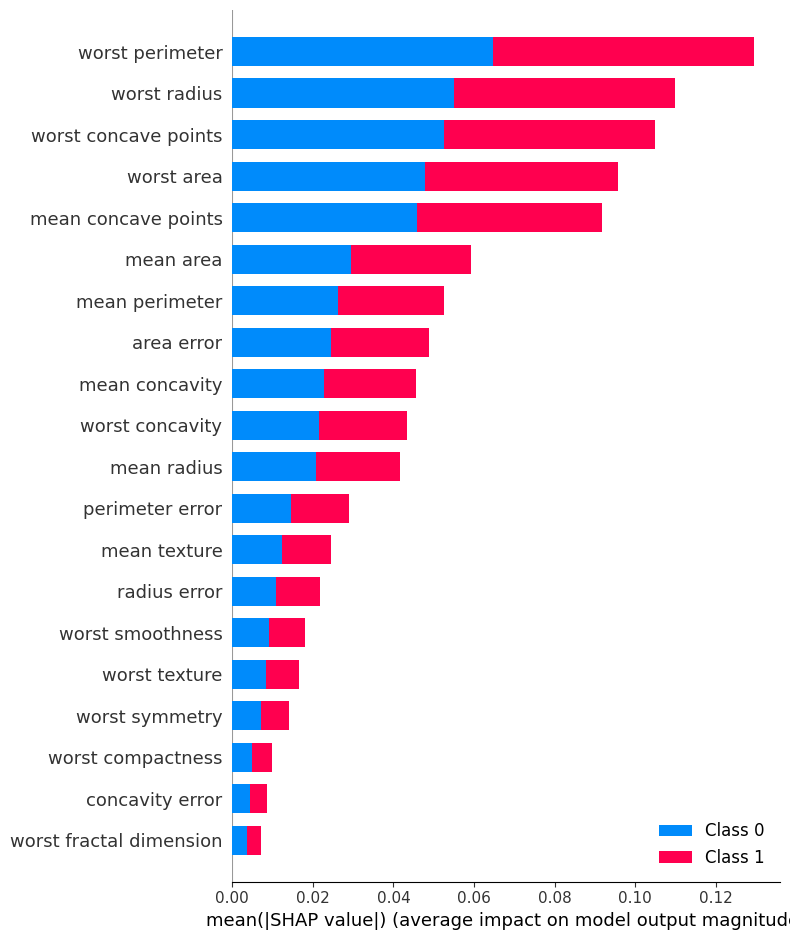

In [25]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [26]:
shap.plots.bar(shap_values[0])

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

In [27]:
choosen_instance = X_test.iloc[[0]]
shap_values_inst = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_inst[1], choosen_instance)

Above is a force plot for feature shapley values. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

#### Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model_best_rf.predict(X_test)
accuracy_score(y_pred=y_pred, y_true=y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

print(f"Precision = {precision_score(y_test, y_pred)}")
print(f"Recall = {recall_score(y_test, y_pred)}")
print(f"F-1 score = {f1_score(y_test, y_pred)}")
print(f"F-2 score = {fbeta_score(y_test, y_pred, beta=2)}")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

In [ ]:
# macro average is arithmetic mean of per class scores
# Read this: https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

##### Evaluating Random Forest model performance and robustness with ROC

In [ ]:
# Predict probabilities instead of 1/0 label
y_pred_prob = model_best_rf.predict_proba(X_test)
y_pred_prob

In [ ]:
y_pred_prob[:,1] > 0.5

In [ ]:
(y_pred_prob[:,1] > 0.7).astype(int)

In [ ]:
cm = confusion_matrix(y_test, (y_pred_prob[:,1] > 0.5).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Interpretation of this result after increasing the threshold 
# Increasing threshold decreases FP, but increases FN such that FP+FN remains constant for a given model+hyperparams
threshold = 0.7
cm = confusion_matrix(y_test, (y_pred_prob[:,1] > threshold).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

![TPFP](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211958&authkey=%21AAtvfe4lv5jfOGg&width=600)

In [ ]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, threshold = roc_curve(y_test, model_best_rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model_best_rf, X_test, y_test)

##### Exercise: Draw a PR curve and understand it

Dont blindly copy code from ChatGPT

### Imbalanced Dataset classification

This is not part of syllabus and is a optional exercise. Refer to this kaggle credit card fraud dataset and look at the provided notebooks
1. https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
2. https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset

pip install imblearn for SMOTE implementation

### Multi class classification

1. Read this article to understand the classification report especially in the case of multi class classification: https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f
2. Download a kaggle dataset for multi class classification. 
3. Your goal is to run all the evaluation metrics, ROC AUC curves and classification reports and see the impact of changing threshold on False Positive and False negatives
4. Dont use iris dataset because the distributions are very cleanly separated and there wont be any real False positive and False negatives

References
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
2. Multiclass ROC plots https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Read about One Versus One (OvO) and One versus Rest (OvR)
https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362

### Stacking (aka Stacked Generalization)

Read up on Stacking Generalization and meta models

In [ ]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset.data
y = dataset.target

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Add the target variable to the dataframe
df['target'] = dataset.target

# Print the first 5 rows of the dataframe
df.head()

In [ ]:
y = df.pop("target")
X = df

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
knn.score(X_test, y_test)

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(n_neighbors=7)
svm = SVC()
lr = LogisticRegression()
stacking = StackingClassifier(estimators=[('knn', knn), ("svc", svm)], final_estimator=lr)
stacking.fit(X_train, y_train)

In [ ]:
y_pred = stacking.predict(X_test)
accuracy = stacking.score(X_test, y_test)
print("Accuracy:", accuracy)